In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

In [3]:
names = pd.read_csv('names.csv')

In [4]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

In [5]:
names.dtypes

Unnamed: 0           int64
names               object
sexe                object
given_since2013    float64
given_since2018    float64
                    ...   
turkish_names      float64
biblic_names       float64
viking_names       float64
mythology_names    float64
fiction_names      float64
Length: 31, dtype: object

In [6]:
names = names.drop(['Unnamed: 0'], axis=1)

In [7]:
print(names.shape)
print(names.isna().sum().sum())
names.head()

(2954, 30)
0


,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,count,category,decade_popularity,flower_names,arabic_names,greek_names,american_names,latin_names,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,AALIYAH,F,2166.0,1245.0,1,1,101.379310,53.684211,7,0,0,2714.0,14,Uncommon,2010s,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AARON,M,22669.0,11797.0,1,1,19.926586,1.644444,5,0,0,33494.0,25,Very Popular,2010s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABBY,F,1791.0,1100.0,1,1,107.894737,26.063830,4,0,0,2456.0,16,Uncommon,2010s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABDALLAH,M,2297.0,929.0,1,1,-40.384615,-36.213992,8,0,0,3915.0,21,Common,2010s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABDEL,M,80.0,0.0,1,0,-100.000000,-9999.000000,5,0,0,1430.0,16,Uncommon,1980s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## X_num & X_cat

In [8]:
first_names = names.names
X = names.drop(['names'], axis=1)

In [9]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

In [10]:
print(X_num.shape)
print(X_cat.shape)

(2954, 26)
(2954, 3)


## OneHotEncoder and MinMaxScaler

In [11]:
## MinMaxScaler

In [12]:
transformer = MinMaxScaler().fit(X_num)

X_num_norm = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_norm, columns=X_num.columns)

print(X_num_norm.shape)
display(X_num_norm.head())


(2954, 26)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,count,flower_names,arabic_names,greek_names,american_names,latin_names,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,0.041476,0.050409,1.0,1.0,0.505069,0.502684,0.357143,0.0,0.0,0.001180,0.106557,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.434081,0.477650,1.0,1.0,0.500996,0.500082,0.214286,0.0,0.0,0.014972,0.196721,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.034295,0.044538,1.0,1.0,0.505395,0.501303,0.142857,0.0,0.0,0.001065,0.122951,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.043984,0.037614,1.0,1.0,0.497981,0.498189,0.428571,0.0,0.0,0.001718,0.163934,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001532,0.000000,1.0,0.0,0.494999,0.000000,0.214286,0.0,0.0,0.000605,0.122951,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
## OneHotEncoder

In [14]:
encoder = OneHotEncoder(drop='first').fit(X_cat) 
cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encoded = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols) #to.array() to change the format to Array
print(X_cat_encoded.shape)
display(X_cat_encoded.head())

(2954, 18)


,sexe_M,category_Popular,category_Rare,category_Uncommon,category_Very Popular,category_Very Rare,decade_popularity_1910s,decade_popularity_1920s,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
X_transf = pd.concat([X_num_norm, X_cat_encoded], axis=1)
print(X_transf.shape)
display(X_transf.head())

(2954, 44)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,count,flower_names,arabic_names,greek_names,american_names,...,category_Uncommon,category_Very Popular,category_Very Rare,decade_popularity_1910s,decade_popularity_1920s,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.041476,0.050409,1.0,1.0,0.505069,0.502684,0.357143,0.0,0.0,0.001180,0.106557,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.434081,0.477650,1.0,1.0,0.500996,0.500082,0.214286,0.0,0.0,0.014972,0.196721,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.034295,0.044538,1.0,1.0,0.505395,0.501303,0.142857,0.0,0.0,0.001065,0.122951,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.043984,0.037614,1.0,1.0,0.497981,0.498189,0.428571,0.0,0.0,0.001718,0.163934,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.001532,0.000000,1.0,0.0,0.494999,0.000000,0.214286,0.0,0.0,0.000605,0.122951,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## K means Model

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

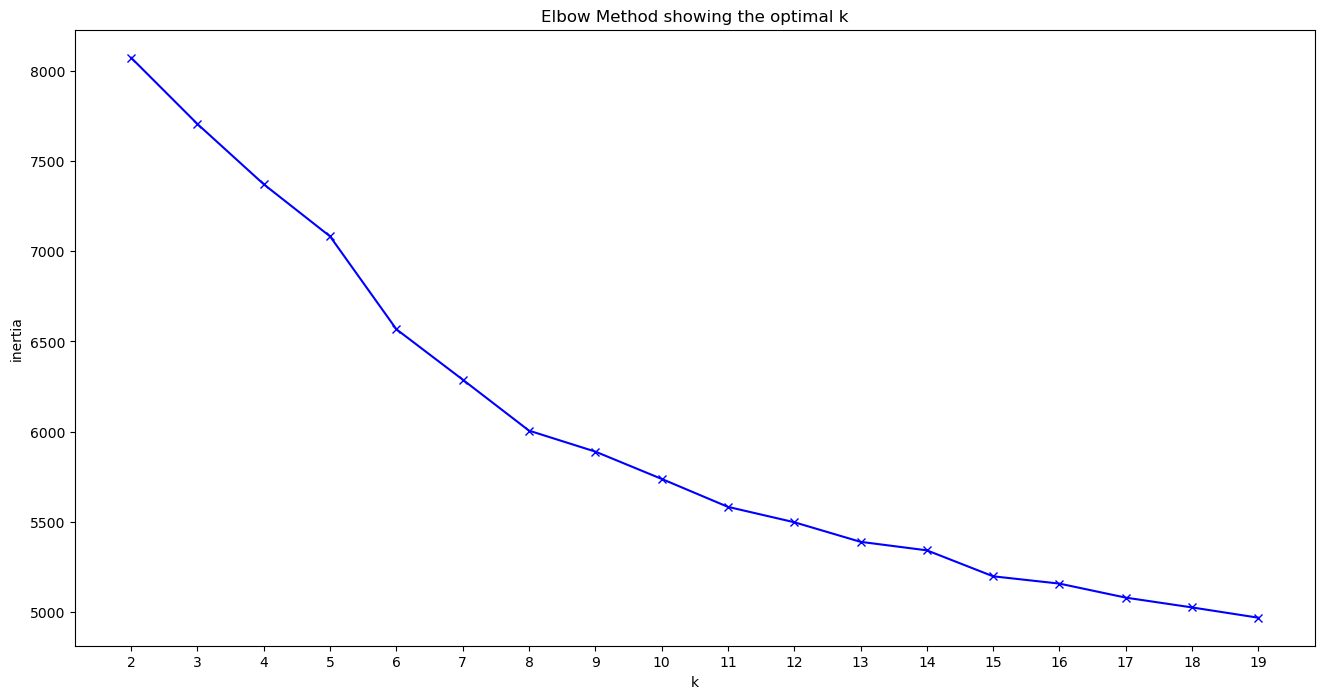

In [80]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=89)
    kmeans.fit(X_transf)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [17]:
# let's see the sihlouette score

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

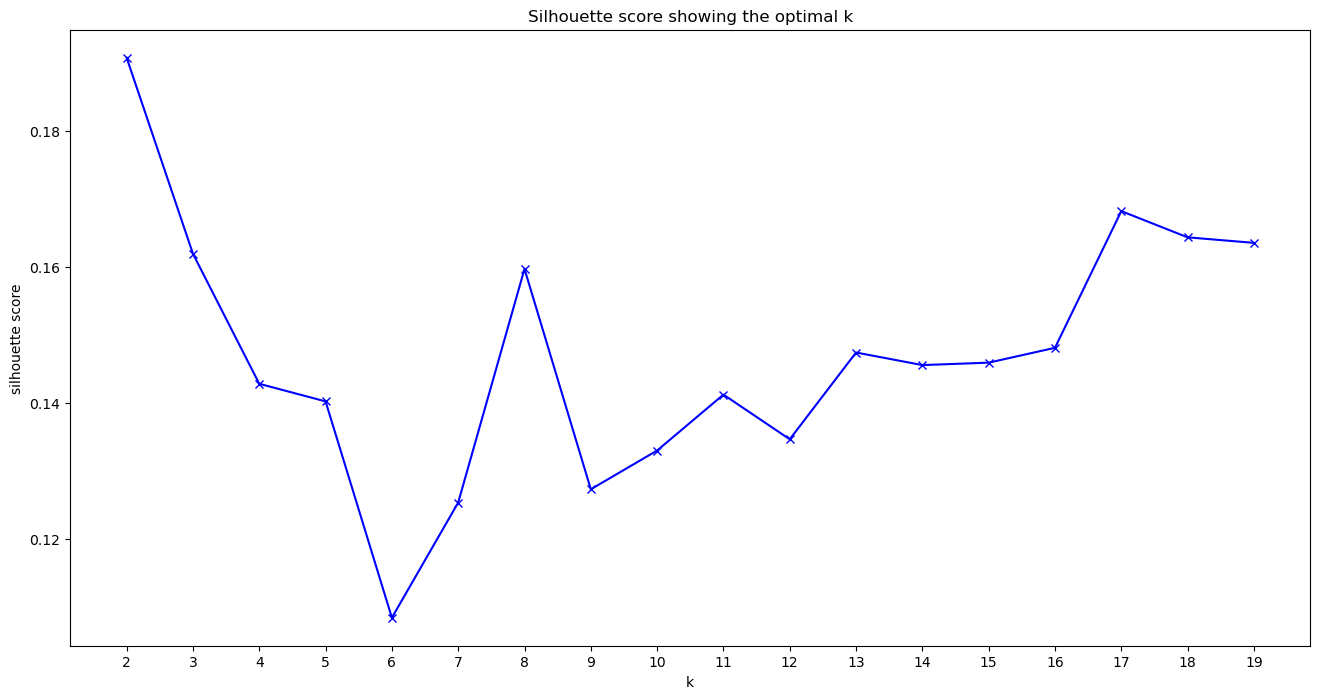

In [81]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=9)
    kmeans.fit(X_transf)
    silhouette.append(silhouette_score(X_transf, kmeans.predict(X_transf)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [19]:
# pick at 9 and 15 and 18

In [20]:
# kmeans = KMeans(n_clusters=9, random_state=789)
# kmeans.fit(X_transf)
# print(kmeans.inertia_)

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5836.918768936139


In [82]:
kmeans = KMeans(n_clusters=17, random_state=9)
kmeans.fit(X_transf)
print(kmeans.inertia_)

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4893.254750548599


## Concat Dataset names with the clusters

In [83]:
clusters = kmeans.predict(X_transf)
pd.Series(clusters).value_counts().sort_index()

0     178
1     203
2     292
3     112
4     187
5     149
6     143
7     230
8     223
9     112
10    209
11     98
12    153
13    190
14    216
15    158
16    101
Name: count, dtype: int64

In [84]:
df_clusters = pd.DataFrame(clusters, columns=['clusters'])

In [85]:
names_clusters = pd.concat([names, df_clusters], axis=1)

In [86]:
names_clusters[names_clusters['clusters']== 11]

,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,count,category,decade_popularity,...,arabic_names,greek_names,american_names,latin_names,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names,clusters
28,ADELAIDE,F,0.0,0.0,0,0,-9999.0,-9999.0,8,0,0,7299.0,48,Common,1980s,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,11
147,AMANDA,F,0.0,0.0,0,0,-9999.0,-9999.0,6,0,0,4700.0,27,Common,1980s,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11
228,ANNE-CHARLOTTE,F,0.0,0.0,0,0,-9999.0,-9999.0,14,1,0,2920.0,17,Common,1980s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
229,ANNE-CLAIRE,F,0.0,0.0,0,0,-9999.0,-9999.0,11,1,0,5175.0,28,Common,1980s,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
230,ANNE-CÉCILE,F,0.0,0.0,0,0,-9999.0,-9999.0,11,1,0,3518.0,22,Common,1980s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,VIANNEY,M,81.0,0.0,1,0,-100.0,-9999.0,7,0,0,3470.0,33,Common,1980s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2792,VIOLAINE,F,0.0,0.0,0,0,-9999.0,-9999.0,8,0,0,6474.0,33,Common,1980s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2796,VIRGINIA,F,0.0,0.0,0,0,-9999.0,-9999.0,8,0,0,807.0,7,Rare,1980s,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2861,YOANN,M,519.0,0.0,1,0,-100.0,-9999.0,5,0,0,42108.0,44,Very Popular,1980s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [87]:
# I want to check below if the number of F and M per cluster is equivalent

In [88]:
cluster_check = names_clusters.pivot_table(index = ['clusters', 'sexe'], values = 'names', aggfunc = 'count')

In [89]:
cluster_check.T

clusters   0       1         2         3   4        5       6        7       \
sexe        F   M   F    M    F    M    M   F    M   F   M   F   M    F   M   
names     116  62  97  106  147  145  112  83  104  90  59  99  44  153  77   

clusters  ...  9       10       11       12   13       14      15      16      
sexe      ...   F   M   F    M   F   M    F    F   M    F   M   F   M   F   M  
names     ...  60  52  96  113  63  35  153  102  88  132  84  83  75  63  38  

[1 rows x 32 columns]

In [29]:
# Conclusion = no imbalanced cluster

## Recommandations

    1- ask for input genre: "boy or girl?"
    
    2- ask for input name: what name do you like ?

    3- if input name in names_cluster DF == F
    
        3a- search the cluster of input name 
          
        3b- give a recommandation from the same cluster
          
          4- input question: do you like the name?
          
              4a- if yes, give another name from the same cluster
          
              4b- if no, give a name from another cluster 
          
              5- input question: do you like the name?
              
                  5a- if yes, give another name from the same cluster
          
                  5b- if no, give a name from another cluster 
          
    6- if input name in names_cluster DF == M
    
        6a- search the cluster of input name
          
        6b- give a recommandation from the same cluster
          
        7- input question: do you like the name?
          
            7a- if yes, give another name from the same cluster
          
            7b- if no, give a name from another cluster 
          
             8- input question: do you like the name?
              
                  8a- if yes, give another name from the same cluster
          
                  8b- if no, give a name from another cluster 

STOP


In [90]:
def recommended_name(names_clusters, input_gender):
    
# 1- Ask for input gender and name
    input_gender = input_gender.lower()
    while input_gender not in ['girl', 'boy']:
        print('Your answer is incorrect, please try again')
        input_gender = input('Are you looking for a recommandation for a girl or a boy? Please enter girl or boy: ')
    
    input_name = input('Enter a name you like: ')
    input_name = input_name.upper()
    
    while input_name not in names_clusters['names'].values:
        print('sorry we do not know this name')
        input_name = input('please try another name: ')
        input_name = input_name.upper()
    
# 2- search the input in our names_cluster DF where sexe = F
    cluster_sexe_F = names_clusters[names_clusters['sexe'] == 'F']
    
    if input_gender == 'girl':
        cluster_label = cluster_sexe_F[cluster_sexe_F['names'] == input_name]['clusters'].iloc[0]
        random_names = cluster_sexe_F[cluster_sexe_F['clusters'] == cluster_label]
    
# 3- give another name from the cluster
        recommended_name1 = random_names[random_names['names'] != input_name].sample(n=1).iloc[0][0]
       
        print(f"Our recommendation is {recommended_name1}.")
        
# 4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)  
        input_question = input('Do you like this name? please answer yes or no: ')
    
        while input_question.lower() not in ['yes', 'no']:
            print('Your answer is incorrect, please try again')
            input_question = input('Do you like this name? please answer yes or no: ')

        
# 5a- if YES, give another name from the same cluster
        if input_question.lower() == 'yes':
            recommended_name2 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name1)].sample(n=1).iloc[0][0]
            print(f"Our next recommendation is {recommended_name2}.")

            
# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

        # 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                recommended_name3 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name1) & (random_names['names'] != recommended_name2)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name3}. Thank you for using our recommender")
        
            else:
        # 7b- if NO, give a name from another cluster
                different_cluster1 = cluster_sexe_F[(cluster_sexe_F['clusters'] != cluster_label)]
                recommended_name4 = different_cluster1.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name4}. Thank you for using our recommender")
        
        else:
# 5b- if NO, give a name from another cluster
            different_cluster2 = cluster_sexe_F[cluster_sexe_F['clusters'] != cluster_label]
            recommended_name5 = different_cluster2.sample(n=1)['names'].iloc[0]
            cluster_recommandation5 = different_cluster2[different_cluster2['names'] == recommended_name5]['clusters'].iloc[0]
            print(f"Our next recommendation is {recommended_name5}.")

# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

# 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                same_cluster = different_cluster2[different_cluster2['clusters'] == cluster_recommandation5] 
                recommended_name6 = same_cluster[(same_cluster['names'] != recommended_name5)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name6}. Thank you for using our recommender")
        
            else:
# 7b- if NO, give a name from another cluster
                different_cluster3 = cluster_sexe_F[(cluster_sexe_F['clusters'] != cluster_label) & (cluster_sexe_F['clusters'] != cluster_recommandation5)]
                recommended_name7 = different_cluster3.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name7}. Thank you for using our recommender")
        

# 2- search the input in our names_cluster DF where sexe = M
    cluster_sexe_M = names_clusters[names_clusters['sexe'] == 'M']
    
    if input_gender == 'boy':
        cluster_label = cluster_sexe_M[cluster_sexe_M['names'] == input_name]['clusters'].iloc[0]
        random_names = cluster_sexe_M[cluster_sexe_M['clusters'] == cluster_label]
    
# 3- give another name from the cluster
        recommended_name11 = random_names[random_names['names'] != input_name].sample(n=1).iloc[0][0]
       
        print(f"Our recommendation is {recommended_name11}.")
        
# 4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)  
        input_question = input('Do you like this name? please answer yes or no: ')
    
        while input_question.lower() not in ['yes', 'no']:
            print('Your answer is incorrect, please try again')
            input_question = input('Do you like this name? please answer yes or no: ')

        
# 5a- if YES, give another name from the same cluster
        if input_question.lower() == 'yes':
            recommended_name12 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name11)].sample(n=1).iloc[0][0]
            print(f"Our next recommendation is {recommended_name12}.")

            
# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

        # 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                recommended_name13 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name11) & (random_names['names'] != recommended_name12)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name13}. Thank you for using our recommender")
        
            else:
        # 7b- if NO, give a name from another cluster
                different_cluster11 = cluster_sexe_M[(cluster_sexe_M['clusters'] != cluster_label)]
                recommended_name14 = different_cluster11.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name14}. Thank you for using our recommender")
        
        else:
# 5b- if NO, give a name from another cluster
            different_cluster12 = cluster_sexe_M[cluster_sexe_M['clusters'] != cluster_label]
            recommended_name15 = different_cluster12.sample(n=1)['names'].iloc[0]
            cluster_recommandation15 = different_cluster12[different_cluster12['names'] == recommended_name15]['clusters'].iloc[0]
            print(f"Our next recommendation is {recommended_name15}.")

# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
            input_question = input('Do you like this name? please answer yes or no: ')
    
            while input_question.lower() not in ['yes', 'no']:
                print('Your answer is incorrect, please answer yes or no')
                input_question = input('Do you like this name? please answer yes or no: ')

# 7a- if YES, give another name from the same cluster
            if input_question.lower() == 'yes':
                same_cluster = different_cluster12[different_cluster12['clusters'] == cluster_recommandation15] 
                recommended_name16 = same_cluster[(same_cluster['names'] != recommended_name15)].sample(n=1).iloc[0][0]
                print(f"Our last recommendation is {recommended_name16}. Thank you for using our recommender")
        
            else:
# 7b- if NO, give a name from another cluster
                different_cluster13 = cluster_sexe_M[(cluster_sexe_M['clusters'] != cluster_label) & (cluster_sexe_M['clusters'] != cluster_recommandation15)]
                recommended_name17 = different_cluster13.sample(n=1)['names'].iloc[0]
                print(f"Our last recommendation is {recommended_name17}. Thank you for using our recommender")
        


In [97]:
user_input = input("Are you looking for a recommandation for a girl or a boy? Please enter girl or boy: ")
recommended_name(names_clusters, user_input)

Are you looking for a recommandation for a girl or a boy? Please enter girl or boy: boy
Enter a name you like: jean-francois
sorry we do not know this name
please try another name: jean-luc
Our recommendation is THIERRY.
Do you like this name? please answer yes or no: no
Our next recommendation is MARIN.
Do you like this name? please answer yes or no: no
Our last recommendation is CAMILLE. Thank you for using our recommender
